In [1]:
library(ggplot2)
library(reshape2)
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



# Input

In [2]:
asv_tab <- read.table("data/asv_table.tsv", sep="\t", comment.char="", skip=1, header=1, row.names=1)
md <- read.table("data/METADATA.txt", sep="\t", header=1, row.names=1)
taxonomy <- read.table("data/taxonomy.tsv", sep="\t", header=1, row.names=1)
shannon <- read.table("data/shannon.tsv", sep="\t", row.names=1, header=1)
pd <- read.table("data/pd.tsv", sep="\t", row.names=1, header=1)
oasvs <- read.table("data/observed_asvs.tsv", sep="\t", row.names=1, header=1)
rownames(md) <- gsub("-",".",rownames(md))
rownames(shannon) <- gsub("-",".",rownames(shannon))
rownames(pd) <- gsub("-",".",rownames(pd))
rownames(oasvs) <- gsub("-",".",rownames(oasvs))

# Data Formatting

In [3]:
asv_tab <- scale(asv_tab, center=FALSE, scale=colSums(asv_tab))
m_asv_tab <- melt(asv_tab)
colnames(m_asv_tab) <- c("asv_id", "sample_id", "rel_abund")
m_asv_tab$phase <- md[as.vector(m_asv_tab$sample_id),'phase']
m_asv_tab$time <- md[as.vector(m_asv_tab$sample_id),'timePoint']
m_asv_tab$type <- md[as.vector(m_asv_tab$sample_id),'sampleType']
m_asv_tab$full_taxonomy <- taxonomy[as.vector(m_asv_tab$asv_id), 'Taxon']
alpha <- melt(as.matrix(data.frame(pd, shannon, oasvs)))
colnames(alpha) <- c("sample_id", "measure", "value")
alpha$time <- md[as.vector(alpha$sample_id),'timePoint']
alpha$phase <- md[as.vector(alpha$sample_id),'phase']
alpha$type <- md[as.vector(alpha$sample_id),'sampleType']
alpha$subject <- md[as.vector(alpha$sample_id), 'subject']
x <- as.vector(alpha$time)
x[x == "B"] <- "-7"
alpha$time <- factor(as.numeric(x), levels=c(-7, 0, 7, 14, 21, 28, 35))
md$timePoint <- factor(md$timePoint, levels=c("B", 0, 7, 14, 21, 28, 35))
alpha$WBC <- md[as.vector(alpha$sample_id), 'WBC']
alpha$Rel_WBC <- md[as.vector(alpha$sample_id), 'Rel_WBC']
alpha$BI <- md[as.vector(alpha$sample_id), 'Bleeding_Index']
alpha$BS <- md[as.vector(alpha$sample_id), 'Bleeding_Score']
alpha$MPD <- md[as.vector(alpha$sample_id), 'MPD']
levels(alpha$type) <- c("Saliva", "Subgingival", "Supragingival", "Tongue")
levels(alpha$phase) <- c("Induction", "Pre-induction", "Restoration")
head(alpha)

sample_id,measure,value,time,phase,type,subject,WBC,Rel_WBC,BI,BS,MPD
P11.Sal.0,faith_pd,11.67312,0,Induction,Saliva,P11,4560000,1.0000000,0.04,18.45,1.98
P11.Sal.14,faith_pd,19.81678,14,Induction,Saliva,P11,2947200,0.6463158,0.13,33.29,1.98
P11.Sal.21,faith_pd,18.56768,21,Induction,Saliva,P11,2200000,0.4824561,0.96,58.33,1.99
P11.Sal.28,faith_pd,16.72866,28,Restoration,Saliva,P11,3043200,0.6673684,1.46,52.98,2.42
P11.Sal.35,faith_pd,11.72115,35,Restoration,Saliva,P11,2526400,0.5540351,0.04,11.31,1.71
P11.Sal.7,faith_pd,11.38721,7,Induction,Saliva,P11,7588800,1.6642105,0.00,2.90,1.29


# Plots

png 
  2

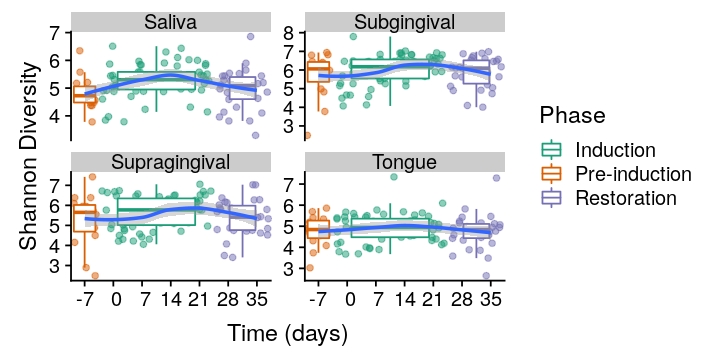

In [4]:
# Alpha Diversity
options(repr.plot.width=6, repr.plot.height=3)
pdf("Figure1.pdf", height=3, width=6)
p<-ggplot(subset(alpha, measure=='shannon'), aes(y=value, x=as.numeric(as.vector(time)))) + 
   facet_wrap(vars(type), ncol=2, scales='free_y') +
   geom_point(aes(colour=phase), alpha=0.5, position='jitter') + 
   geom_boxplot(aes(group=phase, colour=phase), outlier.shape=NA) +
   geom_smooth(method='loess') +
   scale_colour_brewer(palette = "Dark2", name="Phase") +
   xlab("Time (days)") + ylab("Shannon Diversity") +
   scale_x_discrete(limits=as.numeric(as.character(alpha$time)))
p
dev.off()
p

In [5]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_0.9.3  reshape2_1.4.3 ggplot2_3.1.0 

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.19         RColorBrewer_1.1-2   pillar_1.3.0        
 [4] compiler_3.4.3       plyr_1.8.4           bindr_0.1.1         
 [7] base64enc_0.1-3      tools_3.4.3    